In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb  
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.model_selection import train_test_split  #分割数据集
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error   #模型评价
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Eb.csv')
df=df.drop(['Unnamed: 0'],axis=1)
X=df.iloc[:,0:52]
y=df.iloc[:,52]
y
X=X.values
y=y.values.ravel()


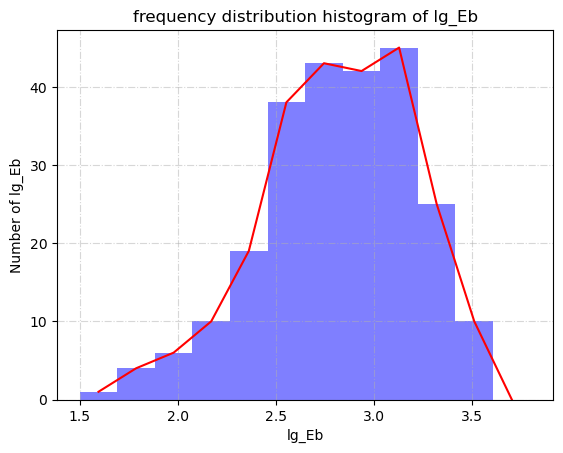

<Figure size 640x480 with 0 Axes>

In [3]:
plt.figure() #初始化一张图

width = 12
n, bins, patches = plt.hist(y,bins = width,range=(1.5,3.8),color='blue',alpha=0.5)
#print(n)
#print(bins)
#print(patches)
plt.grid(alpha=0.5,linestyle='-.') #网格线，更好看 
plt.xlabel('lg_Eb')  
plt.ylabel('Number of lg_Eb')  
plt.title(r'frequency distribution histogram of lg_Eb') #+citys[i])  
plt.xticks(np.arange(0,width,0.5))
plt.plot(bins[0:width]+((bins[1]-bins[0])/2.0),n,color='red')#利用返回值来绘制区间中点连线
plt.show()
plt.savefig('a.png')

In [4]:
df

,preNumRotatableBonds,ex1SlogP_VSA5,pieceBCUT2D_MWLOW,pieceMinPartialCharge,ex1Chi2v,ex2PEOE_VSA7,pieceVSA_EState3,R,pieceSlogP_VSA5,ex1Chi4v,...,ex1VSA_EState10,pieceMinEStateIndex,ex1EState_VSA8,Hs_wt,pieceBCUT2D_MWHI,mac_rate,pieceVSA_EState1,extender1_ratio,pieceHallKierAlpha,lg_Eb
0,153,22.962715,9.507109,-0.452634,9.445570,0.000000,44.466285,0.143,1996.978925,5.369688,...,3.094981,-0.813500,12.132734,0.205,16.966755,50,929.694423,0.500,-35.00000,1.156852
1,86,12.841643,10.043578,-0.465675,3.800879,0.000000,43.395531,1.000,1655.695700,1.546886,...,3.813117,-0.638139,0.000000,0.800,16.854672,100,431.215935,0.450,-56.16000,1.397940
2,193,0.000000,9.755120,-0.452879,6.439838,0.000000,717.707689,0.960,462.299157,5.701319,...,3.771554,-1.333054,0.000000,0.158,33.117194,40,1191.667300,0.000,-145.13000,1.689753
3,193,0.000000,9.755120,-0.452879,6.439838,0.000000,717.707689,0.960,462.299157,5.701319,...,3.771554,-1.333054,0.000000,0.158,33.117194,40,1191.667300,0.013,-145.13000,1.697665
4,193,0.000000,9.755120,-0.452879,6.439838,0.000000,717.707689,0.960,462.299157,5.701319,...,3.771554,-1.333054,0.000000,0.158,33.117194,40,1191.667300,0.040,-145.13000,1.725095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,78,31.377214,9.755125,-0.452879,8.169329,0.000000,60.527702,1.048,1392.591399,5.427776,...,3.354315,-0.849072,31.235111,0.460,33.114667,500,468.463212,0.023,-16.16000,3.468790
241,78,11.126903,9.755040,-0.449557,6.575637,0.000000,67.995612,1.000,1383.467990,2.348369,...,3.852194,-0.313496,48.530937,0.420,16.714537,100,436.358204,0.250,-17.40000,3.491362
242,76,38.524930,9.623484,-0.452879,9.598707,0.000000,48.811432,1.000,1277.977665,4.649681,...,3.710851,-0.494758,24.265468,0.564,16.756446,100,494.545045,0.111,-15.17013,3.494155
243,76,5.563451,9.623486,-0.492818,6.659510,0.000000,48.443641,2.106,1230.311342,2.585039,...,3.289589,-0.614086,29.257873,0.362,16.741743,50,480.483386,0.040,-18.46000,3.498207


MSE_train: 0.019953895732076912 
 MSE_test 0.026390514980435403
MAE_train: 0.10490948525763533 
 MAE_test 0.11823682083876008
R^2_train: 0.8847913936550191 
 R^2_test1: 0.8111977443088628


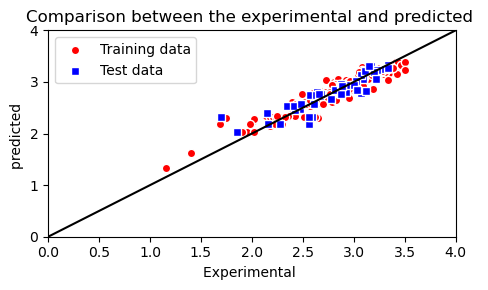

In [17]:
import xgboost as xgb
X_train,X_test= train_test_split(X, test_size=0.2,random_state = 3)
y_train,y_test = train_test_split(y, test_size=0.2,random_state = 3)

#print('X_train shape',X_train.shape,'X_test. shape',X_test.shape)
#print('y_train shape',y_train.shape,'y_test shape',y_test.shape)

from sklearn.preprocessing  import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
model=xgb.XGBRegressor(random_state=0,n_estimators=35,max_depth =2,gamma=0.000001)
model.fit(X_train_std,y_train)
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)
score=r2_score(y_test,y_test_pred)
y_train_pred = model.predict(X_train_std) #预测训练集
y_test_pred= model.predict(X_test_std)   #预测测试集
MSE_train = mean_squared_error(y_train,y_train_pred) 
MSE_test = mean_squared_error(y_test,y_test_pred)
MAE_train = mean_absolute_error(y_train,y_train_pred) 
MAE_test= mean_absolute_error(y_test,y_test_pred)
print('MSE_train:',MSE_train,'\n','MSE_test',MSE_test) 
print('MAE_train:',MAE_train,'\n','MAE_test',MAE_test)
print("R^2_train:",r2_score(y_train,y_train_pred),'\n',"R^2_test1:",r2_score(y_test,y_test_pred))
#真实值预测值平面散点图
plt.figure(figsize=(5,3)) # 指定图片的尺寸
plt.scatter(y_train,y_train_pred,color='red',marker='o',edgecolor='white',label ='Training data') #残差散点图，指定散点的颜色，标记(o为圆圈s为方块)，标签等设定
plt.scatter(y_test,y_test_pred,color='blue',marker='s',edgecolor='white',label ='Test data')
plt.ylabel('predicted ')
plt.xlabel('Experimental ')
plt.title('Comparison between the experimental and predicted ')
plt.legend(loc = 'upper left') #图例位置
plt.plot([0, 4], [0, 4],c='black')
plt.xlim([0,4]) # 设定x轴范围
plt.ylim(0,4)
plt.tight_layout() #自动调整子图参数，使之填充整个图像区域，可用于检查坐标轴标签、刻度标签以及标题的部分
#plt.savefig("C:\Users\Administrator\Desktop\test\ILCO2_SVM_pred.png")     #图片保存
plt.show()

In [18]:
test=pd.read_csv('460Eb.csv')
XTEST=test.iloc[:,0:52]
XTEST=XTEST.values
sc = StandardScaler()
#X = sc.fit_transform(X)
XTEST = sc.fit_transform(XTEST)
ypre=model.predict(XTEST)
test['prexgb']=pd.DataFrame(ypre)
#ypre=pd.DataFrame(ypre)
test.to_csv('460Eb1.csv')

MSE_train: 0.008484644686438489 
 MSE_test 0.024393747985176913
MAE_train: 0.0376396137807221 
 MAE_test 0.10680326109767554
R^2_train: 0.9499292521235239 
 R^2_test1: 0.8363258616427168


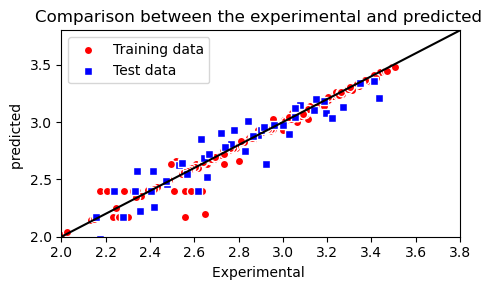

In [5]:
X_train,X_test= train_test_split(X, test_size=0.2,random_state =9)
y_train,y_test = train_test_split(y, test_size=0.2,random_state = 9)

#print('X_train shape',X_train.shape,'X_test. shape',X_test.shape)
#print('y_train shape',y_train.shape,'y_test shape',y_test.shape)

from sklearn.preprocessing  import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=65,max_depth=6,random_state=3)
model.fit(X_train_std, y_train)
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)
score=r2_score(y_test,y_test_pred)
#y_train_pred = model.predict(X_train_std) #预测训练集
#y_test_pred= model.predict(X_test_std)   #预测测试集
MSE_train = mean_squared_error(y_train,y_train_pred) 
MSE_test = mean_squared_error(y_test,y_test_pred)
MAE_train = mean_absolute_error(y_train,y_train_pred) 
MAE_test= mean_absolute_error(y_test,y_test_pred)
print('MSE_train:',MSE_train,'\n','MSE_test',MSE_test) 
print('MAE_train:',MAE_train,'\n','MAE_test',MAE_test)
print("R^2_train:",r2_score(y_train,y_train_pred),'\n',"R^2_test1:",r2_score(y_test,y_test_pred))
#真实值预测值平面散点图
plt.figure(figsize=(5,3)) # 指定图片的尺寸
plt.scatter(y_train,y_train_pred,color='red',marker='o',edgecolor='white',label ='Training data') #残差散点图，指定散点的颜色，标记(o为圆圈s为方块)，标签等设定
plt.scatter(y_test,y_test_pred,color='blue',marker='s',edgecolor='white',label ='Test data')
plt.ylabel('predicted ')
plt.xlabel('Experimental ')
plt.title('Comparison between the experimental and predicted ')
plt.legend(loc = 'upper left') #图例位置
plt.plot([2, 3.8], [2, 3.8],c='black')
plt.xlim([2,3.8]) # 设定x轴范围
plt.ylim(2,3.8)
plt.tight_layout() #自动调整子图参数，使之填充整个图像区域，可用于检查坐标轴标签、刻度标签以及标题的部分
#plt.savefig("C:\Users\Administrator\Desktop\test\ILCO2_SVM_pred.png")     #图片保存
plt.show()

In [17]:
test=pd.read_csv('460Eb1.csv')
XTEST=test.iloc[:,0:52]
XTEST=XTEST.values
sc = StandardScaler()
#X = sc.fit_transform(X)
XTEST = sc.fit_transform(XTEST)
ypre=model.predict(XTEST)
test['pregbr']=pd.DataFrame(ypre)
#ypre=pd.DataFrame(ypre)
test.to_csv('460Eb1.csv')

In [37]:
df=pd.read_csv('Ebsisso20.csv')
X = df.iloc[:,0:20] 
sc = StandardScaler()
X1 = sc.fit_transform(X)
X1=pd.DataFrame(X1,columns=X.columns)

In [40]:
X1.to_csv('acc.csv')

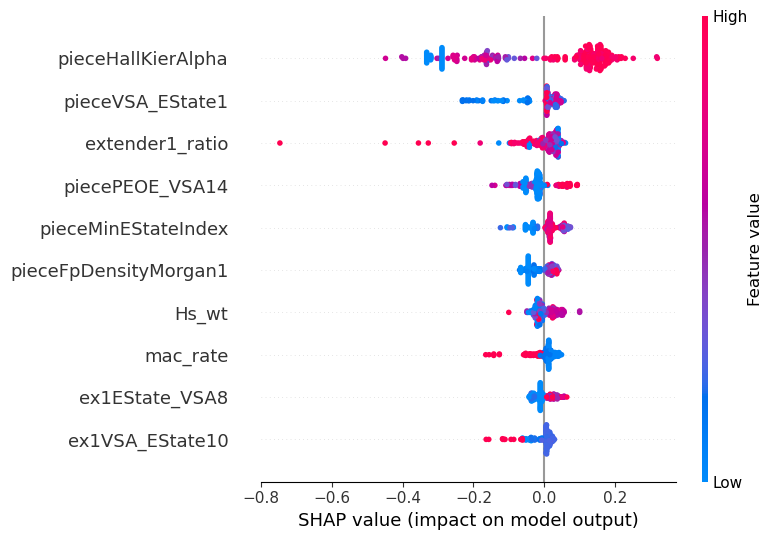

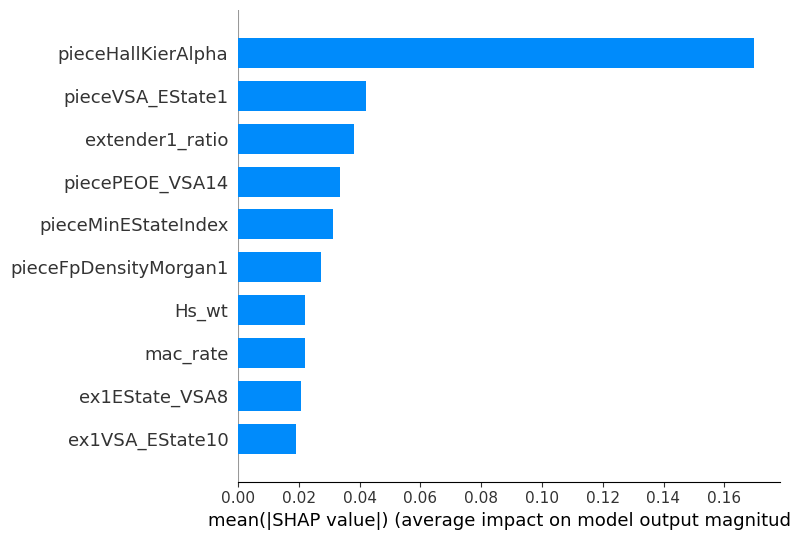

In [18]:

sc = StandardScaler()
X= sc.fit_transform(X)
X1=df.iloc[:,0:52]
X=pd.DataFrame(X,columns=X1.columns)
import shap
import json 
shap.initjs()
explainer = shap.Explainer(model)
shap_values = explainer(X)
shap.summary_plot(shap_values, X,max_display=10)
shap.summary_plot(shap_values, X,max_display=10, 
                  plot_type="bar")


In [39]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
des_list = ['NumRotatableBonds', 'HallKierAlpha', 'MinEStateIndex', 'MinEStateIndex', 'VSA_EState1']
calculator = MoleculeDescriptors.MolecularDescriptorCalculator(des_list)
calculator.GetDescriptorSummaries()

['Number of Rotatable Bonds',
 'N/A',
 'N/A',
 'N/A',
 'VSA EState Descriptor 1 (-inf < x <  4.78)']

In [32]:
explainer = shap.TreeExplainer(model=model)
shap_values = explainer.shap_values(X)

In [34]:
 X.columns

Index(['preNumRotatableBonds', 'ex1SlogP_VSA5', 'pieceBCUT2D_MWLOW',
       'pieceMinPartialCharge', 'ex1Chi2v', 'ex2PEOE_VSA7', 'pieceVSA_EState3',
       'R', 'pieceSlogP_VSA5', 'ex1Chi4v', 'pieceMolLogP', 'pieceVSA_EState10',
       'piecePEOE_VSA14', 'ex2HallKierAlpha', 'ex2EState_VSA7', 'ex1Kappa3',
       'piecePEOE_VSA8', 'Diisocyanate_ratio', 'pieceFpDensityMorgan3',
       'ex1HallKierAlpha', 'pieceBCUT2D_MRHI', 'piecePEOE_VSA10',
       'pieceMaxAbsPartialCharge', 'piecePEOE_VSA2', 'ex2PEOE_VSA14',
       'pieceMaxEStateIndex', 'pieceEState_VSA9', 'pieceFpDensityMorgan1',
       'preBalabanJ', 'ex1HeavyAtomMolWt', 'piecePEOE_VSA7', 'pieceqed',
       'extender2_ratio', 'pieceVSA_EState7', 'pieceChi4v', 'ex2Chi4v',
       'ex2Kappa3', 'ex1EState_VSA6', 'pieceVSA_EState9',
       'pieceMinAbsEStateIndex', 'pieceEState_VSA5', 'polyol_ratio', 'preqed',
       'ex1VSA_EState10', 'pieceMinEStateIndex', 'ex1EState_VSA8', 'Hs_wt',
       'pieceBCUT2D_MWHI', 'mac_rate', 'pieceVSA_ESta

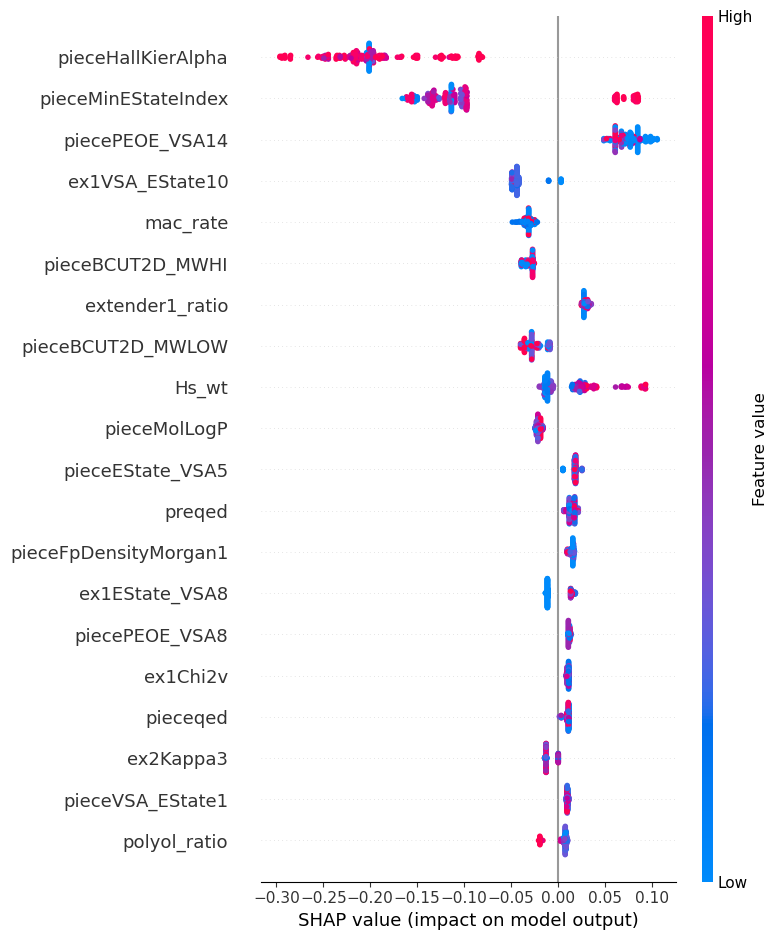

In [35]:
shap.summary_plot(shap_values, X, X.columns,max_display=20, color_bar=True, show=False)

MSE_train: 0.023497598138325713 
 MSE_test 0.028429487341486925
MAE_train: 0.11155442141114301 
 MAE_test 0.12072923268148136
R^2_train: 0.8613327539846896 
 R^2_test1: 0.8092473593076102


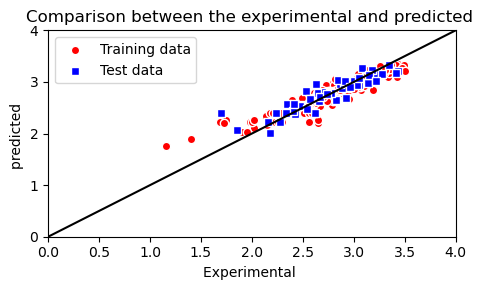

In [13]:
X_train,X_test= train_test_split(X, test_size=0.2,random_state = 9)
y_train,y_test = train_test_split(y, test_size=0.2,random_state = 9)

#print('X_train shape',X_train.shape,'X_test. shape',X_test.shape)
#print('y_train shape',y_train.shape,'y_test shape',y_test.shape)

from sklearn.preprocessing  import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_features=27,n_estimators=70,max_depth=6,random_state=6,n_jobs=-1)
model.fit(X_train_std,y_train)
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)
score=r2_score(y_test,y_test_pred)
y_train_pred = model.predict(X_train_std) #预测训练集
y_test_pred= model.predict(X_test_std)   #预测测试集
MSE_train = mean_squared_error(y_train,y_train_pred) 
MSE_test = mean_squared_error(y_test,y_test_pred)
MAE_train = mean_absolute_error(y_train,y_train_pred) 
MAE_test= mean_absolute_error(y_test,y_test_pred)
print('MSE_train:',MSE_train,'\n','MSE_test',MSE_test) 
print('MAE_train:',MAE_train,'\n','MAE_test',MAE_test)
print("R^2_train:",r2_score(y_train,y_train_pred),'\n',"R^2_test1:",r2_score(y_test,y_test_pred))
#真实值预测值平面散点图
plt.figure(figsize=(5,3)) # 指定图片的尺寸
plt.scatter(y_train,y_train_pred,color='red',marker='o',edgecolor='white',label ='Training data') #残差散点图，指定散点的颜色，标记(o为圆圈s为方块)，标签等设定
plt.scatter(y_test,y_test_pred,color='blue',marker='s',edgecolor='white',label ='Test data')
plt.ylabel('predicted ')
plt.xlabel('Experimental ')
plt.title('Comparison between the experimental and predicted ')
plt.legend(loc = 'upper left') #图例位置
plt.plot([0, 4], [0, 4],c='black')
plt.xlim([0,4]) # 设定x轴范围
plt.ylim(0,4)
plt.tight_layout() #自动调整子图参数，使之填充整个图像区域，可用于检查坐标轴标签、刻度标签以及标题的部分
#plt.savefig("C:\Users\Administrator\Desktop\test\ILCO2_SVM_pred.png")     #图片保存
plt.show()

MSE_train: 0.008304685675457439 
 MSE_test 0.033244897713883774
MAE_train: 0.028985046353896107 
 MAE_test 0.12293625461688307
R^2_train: 0.950991250898951 
 R^2_test1: 0.7769375172932665


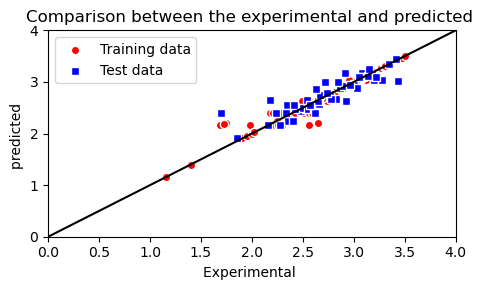

In [8]:
X_train,X_test= train_test_split(X, test_size=0.2,random_state = 9)
y_train,y_test = train_test_split(y, test_size=0.2,random_state = 9)
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=14,random_state=8)
model.fit(X_train_std,y_train)
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)
score=r2_score(y_test,y_test_pred)
y_train_pred = model.predict(X_train_std) #预测训练集
y_test_pred= model.predict(X_test_std)   #预测测试集
MSE_train = mean_squared_error(y_train,y_train_pred) 
MSE_test = mean_squared_error(y_test,y_test_pred)
MAE_train = mean_absolute_error(y_train,y_train_pred) 
MAE_test= mean_absolute_error(y_test,y_test_pred)
print('MSE_train:',MSE_train,'\n','MSE_test',MSE_test) 
print('MAE_train:',MAE_train,'\n','MAE_test',MAE_test)
print("R^2_train:",r2_score(y_train,y_train_pred),'\n',"R^2_test1:",r2_score(y_test,y_test_pred))
#真实值预测值平面散点图
plt.figure(figsize=(5,3)) # 指定图片的尺寸
plt.scatter(y_train,y_train_pred,color='red',marker='o',edgecolor='white',label ='Training data') #残差散点图，指定散点的颜色，标记(o为圆圈s为方块)，标签等设定
plt.scatter(y_test,y_test_pred,color='blue',marker='s',edgecolor='white',label ='Test data')
plt.ylabel('predicted ')
plt.xlabel('Experimental ')
plt.title('Comparison between the experimental and predicted ')
plt.legend(loc = 'upper left') #图例位置
plt.plot([0, 4], [0, 4],c='black')
plt.xlim([0,4]) # 设定x轴范围
plt.ylim(0,4)
plt.tight_layout() #自动调整子图参数，使之填充整个图像区域，可用于检查坐标轴标签、刻度标签以及标题的部分
#plt.savefig("C:\Users\Administrator\Desktop\test\ILCO2_SVM_pred.png")     #图片保存
plt.show()

X_train shape (196, 52) X_test. shape (49, 52)
y_train shape (196,) y_test shape (49,)
Epoch 1/967
7/7 [==============================] - 0s 16ms/step - loss: 3.7535 - val_loss: 0.9492
Epoch 2/967
7/7 [==============================] - 0s 4ms/step - loss: 0.5491 - val_loss: 0.9618
Epoch 3/967
7/7 [==============================] - 0s 5ms/step - loss: 0.6509 - val_loss: 0.3255
Epoch 4/967
7/7 [==============================] - 0s 4ms/step - loss: 0.2666 - val_loss: 0.3067
Epoch 5/967
7/7 [==============================] - 0s 4ms/step - loss: 0.3071 - val_loss: 0.2273
Epoch 6/967
7/7 [==============================] - 0s 4ms/step - loss: 0.2036 - val_loss: 0.2072
Epoch 7/967
7/7 [==============================] - 0s 4ms/step - loss: 0.2016 - val_loss: 0.1766
Epoch 8/967
7/7 [==============================] - 0s 4ms/step - loss: 0.1688 - val_loss: 0.1387
Epoch 9/967
7/7 [==============================] - 0s 4ms/step - loss: 0.1537 - val_loss: 0.1186
Epoch 10/967
7/7 [=====================

Epoch 84/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0478 - val_loss: 0.0331
Epoch 85/967
7/7 [==============================] - 0s 3ms/step - loss: 0.0468 - val_loss: 0.0454
Epoch 86/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0521 - val_loss: 0.0362
Epoch 87/967
7/7 [==============================] - 0s 5ms/step - loss: 0.0455 - val_loss: 0.0363
Epoch 88/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0485 - val_loss: 0.0340
Epoch 89/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0455 - val_loss: 0.0363
Epoch 90/967
7/7 [==============================] - 0s 3ms/step - loss: 0.0451 - val_loss: 0.0359
Epoch 91/967
7/7 [==============================] - 0s 3ms/step - loss: 0.0451 - val_loss: 0.0412
Epoch 92/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0465 - val_loss: 0.0337
Epoch 93/967
7/7 [==============================] - 0s 3ms/step - loss: 0.0484 - val_loss: 0.0340
Epoch 94/967
7/7 [==

Epoch 167/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0409
Epoch 168/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0428 - val_loss: 0.0375
Epoch 169/967
7/7 [==============================] - 0s 3ms/step - loss: 0.0411 - val_loss: 0.0364
Epoch 170/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0366 - val_loss: 0.0509
Epoch 171/967
7/7 [==============================] - 0s 3ms/step - loss: 0.0403 - val_loss: 0.0384
Epoch 172/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0381 - val_loss: 0.0382
Epoch 173/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0400 - val_loss: 0.0395
Epoch 174/967
7/7 [==============================] - 0s 3ms/step - loss: 0.0360 - val_loss: 0.0368
Epoch 175/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0368 - val_loss: 0.0367
Epoch 176/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0362 - val_loss: 0.0410
Epoch 177/

Epoch 332/967
7/7 [==============================] - 0s 3ms/step - loss: 0.0290 - val_loss: 0.0479
Epoch 333/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0284 - val_loss: 0.0474
Epoch 334/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0293 - val_loss: 0.0485
Epoch 335/967
7/7 [==============================] - 0s 3ms/step - loss: 0.0287 - val_loss: 0.0485
Epoch 336/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0281 - val_loss: 0.0522
Epoch 337/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0304 - val_loss: 0.0536
Epoch 338/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0292 - val_loss: 0.0476
Epoch 339/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0272 - val_loss: 0.0501
Epoch 340/967
7/7 [==============================] - 0s 3ms/step - loss: 0.0288 - val_loss: 0.0476
Epoch 341/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0274 - val_loss: 0.0487
Epoch 342/

Epoch 497/967
7/7 [==============================] - 0s 3ms/step - loss: 0.0264 - val_loss: 0.0547
Epoch 498/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0242 - val_loss: 0.0579
Epoch 499/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0231 - val_loss: 0.0601
Epoch 500/967
7/7 [==============================] - 0s 3ms/step - loss: 0.0210 - val_loss: 0.0600
Epoch 501/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0220 - val_loss: 0.0557
Epoch 502/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0214 - val_loss: 0.0603
Epoch 503/967
7/7 [==============================] - 0s 3ms/step - loss: 0.0220 - val_loss: 0.0562
Epoch 504/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0220 - val_loss: 0.0591
Epoch 505/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0232 - val_loss: 0.0682
Epoch 506/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0245 - val_loss: 0.0611
Epoch 507/

Epoch 662/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0214 - val_loss: 0.0604
Epoch 663/967
7/7 [==============================] - 0s 3ms/step - loss: 0.0264 - val_loss: 0.0704
Epoch 664/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0229 - val_loss: 0.0653
Epoch 665/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0211 - val_loss: 0.0650
Epoch 666/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0239 - val_loss: 0.0612
Epoch 667/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0234 - val_loss: 0.0595
Epoch 668/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0221 - val_loss: 0.0624
Epoch 669/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0204 - val_loss: 0.0631
Epoch 670/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0202 - val_loss: 0.0627
Epoch 671/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0212 - val_loss: 0.0617
Epoch 672/

Epoch 827/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0175 - val_loss: 0.0606
Epoch 828/967
7/7 [==============================] - 0s 3ms/step - loss: 0.0178 - val_loss: 0.0581
Epoch 829/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0186 - val_loss: 0.0529
Epoch 830/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0188 - val_loss: 0.0544
Epoch 831/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0190 - val_loss: 0.0558
Epoch 832/967
7/7 [==============================] - 0s 3ms/step - loss: 0.0175 - val_loss: 0.0556
Epoch 833/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0160 - val_loss: 0.0564
Epoch 834/967
7/7 [==============================] - 0s 3ms/step - loss: 0.0165 - val_loss: 0.0563
Epoch 835/967
7/7 [==============================] - 0s 4ms/step - loss: 0.0162 - val_loss: 0.0551
Epoch 836/967
7/7 [==============================] - 0s 3ms/step - loss: 0.0176 - val_loss: 0.0552
Epoch 837/

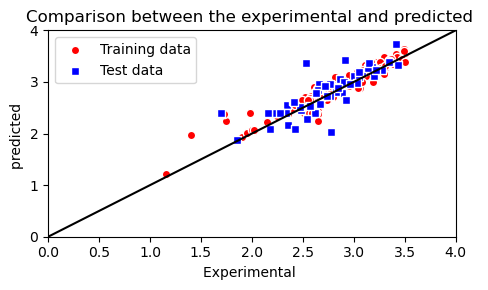

In [19]:
#ann
#y=y.values.ravel()
X_train,X_test= train_test_split(X, test_size=0.2,random_state = 9)
y_train,y_test = train_test_split(y, test_size=0.2,random_state = 9)

print('X_train shape',X_train.shape,'X_test. shape',X_test.shape)
print('y_train shape',y_train.shape,'y_test shape',y_test.shape)
from sklearn.preprocessing  import MinMaxScaler
mm1=MinMaxScaler()
X_train_std=mm1.fit_transform(X_train) #使用fit方法训练标准化变化器,然后用transform方法实行标准化.可使用fit_transform将训练和标准化同时进行，然后将标准化后的X_train用X_train_std来表示
X_test_std=mm1.transform(X_test)
#ANN
import tensorflow as tf
from keras.models import Model
from tensorflow.python.keras.layers.core import Dense,Flatten
from keras import optimizers
from keras.models import Sequential
from keras import models
from keras import layers
import tensorflow as tf#pip install tensorflow
import random
import random
random.seed(0)
np.random.seed(0)#固定随机数
tf.random.set_seed(0)

input1 = tf.keras.layers.Input(shape=[52], name="input")
XR1=tf.keras.layers.Dense(32,activation='relu')(input1)
XR2=tf.keras.layers.Dense(8,activation='relu')(XR1)
#XR3=tf.keras.layers.Dense(c,activation='relu')(XR2)
output=tf.keras.layers.Dense(1,activation='relu')(XR2)


model = tf.keras.models.Model(inputs=[input1],
                           outputs=[output])

model.compile(loss="mse", optimizer=optimizers.Adam(learning_rate=0.004))

history = model.fit(X_train_std, y_train, epochs=967,
                    validation_data=(X_test_std, y_test),batch_size=28)
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)
score_train=r2_score(y_train,y_train_pred)
score_test=r2_score(y_test,y_test_pred)
print(score_train)
print(score_test)
#真实值预测值平面散点图
plt.figure(figsize=(5,3)) # 指定图片的尺寸
plt.scatter(y_train,y_train_pred,color='red',marker='o',edgecolor='white',label ='Training data') #残差散点图，指定散点的颜色，标记(o为圆圈s为方块)，标签等设定
plt.scatter(y_test,y_test_pred,color='blue',marker='s',edgecolor='white',label ='Test data')
plt.ylabel('predicted ')
plt.xlabel('Experimental ')
plt.title('Comparison between the experimental and predicted ')
plt.legend(loc = 'upper left') #图例位置
plt.plot([0, 4], [0, 4],c='black')
plt.xlim([0,4]) # 设定x轴范围
plt.ylim(0,4)
plt.tight_layout() #自动调整子图参数，使之填充整个图像区域，可用于检查坐标轴标签、刻度标签以及标题的部分
#plt.savefig("C:\Users\Administrator\Desktop\test\ILCO2_SVM_pred.png")     #图片保存
plt.show()

In [20]:
test=pd.read_csv('Ebtest.csv')
XTEST=test.iloc[:,0:52]
XTEST=XTEST.values
#sc = StandardScaler()
#X = sc.fit_transform(X)
XTEST = mm1.transform(XTEST)
ypre=model.predict(XTEST)
test['preann']=pd.DataFrame(ypre)
#ypre=pd.DataFrame(ypre)
test.to_csv('Ebtest.csv')

1/1 [==============================] - 0s 14ms/step


(0.0, 1.1)

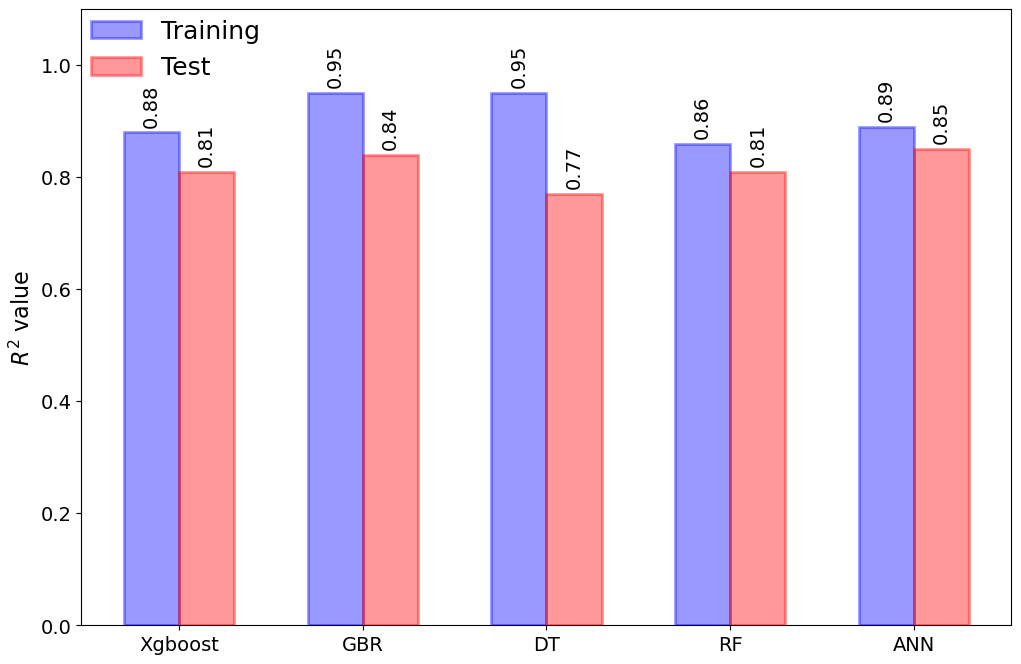

In [9]:
methods = ['Xgboost', 'GBR', 'DT', 'RF', 'ANN']
use_method = ['{}'.format(m) for m in methods ]

r2_trn = [0.88,0.95,0.95,0.86,0.89]
r2_tes = [0.81,0.84,0.77,0.81,0.85]

width =0.3
plt.figure(facecolor='white', figsize=(12,8))
ind = np.arange(len(methods))
plt.bar(ind, r2_trn, width, color='blue', alpha=0.4, edgecolor='blue', linewidth=2, label = 'Training')
plt.bar(ind+width, r2_tes, width, color='red', alpha=0.4, edgecolor='red', linewidth=2, label = 'Test')

for x,y in zip(ind, r2_trn):
    plt.text(x, y+0.01, '%.2f' % y, ha='center', va= 'bottom', rotation=90, fontsize=14)

for x,y in zip(ind, r2_tes):
    plt.text(x+ width, y+0.01, '%.2f' % y, ha='center', va= 'bottom', rotation=90, fontsize=14)

plt.xticks(ind+(width*0.5), methods, fontsize=14)
#plt.tick_params(length=0)
plt.yticks(fontsize=14)
plt.ylabel('$R^{2}$ value', fontsize=16)
#plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=10)
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=0, fontsize=18, frameon=False)
plt.ylim(0, 1.1)
#plt.savefig(f'{PATH}/{date}_{Reaction}_ML_methods_prop{add_model}_R2_v2.png', dpi=600, bbox_inches='tight')